In [ ]:
!pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

# Load dataset


In [ ]:
from datasets import load_dataset

ds = load_dataset("facebook/voxpopuli", "en", streaming=True, split="train")

In [ ]:
ds

IterableDataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
    n_shards: 1
})

In [ ]:
next(iter(ds))

{'audio_id': '20180418-0900-PLENARY-3-en_20180418-08:50:36_17',
 'language': 0,
 'audio': {'path': 'train_part_0/20180418-0900-PLENARY-3-en_20180418-08:50:36_17.wav',
  'array': array([-0.00030518,  0.00119019,  0.00506592, ..., -0.00036621,
         -0.00027466, -0.00018311]),
  'sampling_rate': 16000},
 'raw_text': 'If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.',
 'normalized_text': 'if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.',
 'gender': 'female',
 'speaker_id': '124737',
 'is_gold_transcript': True,
 'accent': 'None'}

# Get an example

In [ ]:
ds_sample = ds.take(3)
samples = list(ds_sample)

In [ ]:
example = samples[2]; example

{'audio_id': '20180314-0900-PLENARY-13-en_20180314-16:03:18_3',
 'language': 0,
 'audio': {'path': 'train_part_0/20180314-0900-PLENARY-13-en_20180314-16:03:18_3.wav',
  'array': array([ 0.00201416, -0.00344849, -0.00460815, ...,  0.00076294,
          0.00198364,  0.0012207 ]),
  'sampling_rate': 16000},
 'raw_text': 'In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,',
 'normalized_text': 'in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration',
 'gender': 'female',
 'speaker_id': 'None',
 'is_gold_transcript': True,
 'accent': 'None'}

# Plot the example's waveform & spectrogram.

In [ ]:
arr = example['audio']['array']
sampling_rate = example['audio']['sampling_rate']

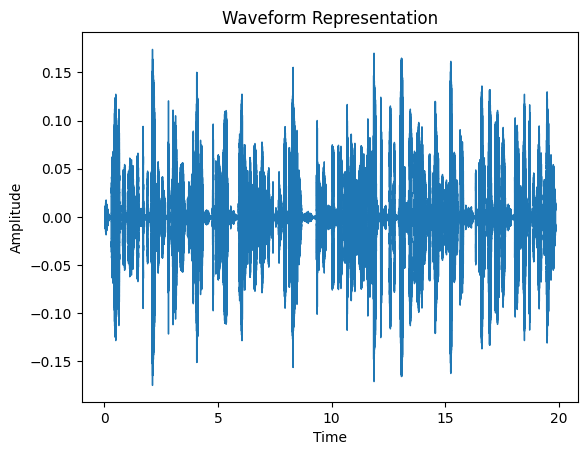

In [ ]:
# Waveform

import librosa
import matplotlib.pyplot as plt
import librosa.display

librosa.display.waveshow(arr, sr=sampling_rate)
plt.title("Waveform Representation")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

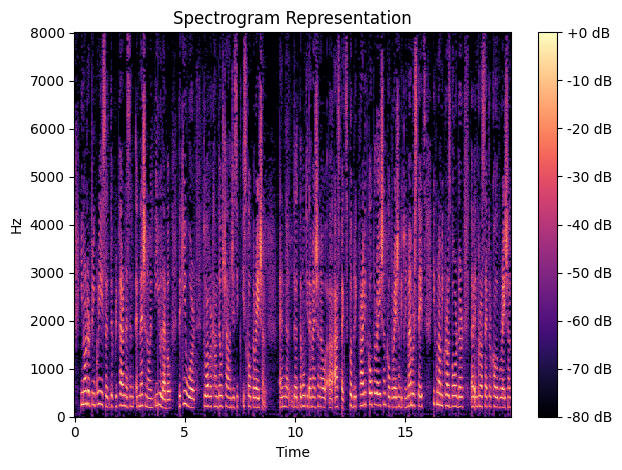

In [ ]:
import numpy as np
# Spectrogram

freq_rep = librosa.stft(arr)
freq_rep_db = librosa.amplitude_to_db(np.abs(freq_rep), ref=np.max)
librosa.display.specshow(freq_rep_db, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram Representation")
plt.tight_layout()
plt.show()

# Automatic speech recognition

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="openai/whisper-small.en")

config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [ ]:
pipe(arr)

{'text': ' In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects, public-private cooperation, cooperation between member states, economic cross-border and cross-sector collaboration,'}

# Compare transcription against original transcription

In [ ]:
example['raw_text']

'In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,'

# Play audio


In [ ]:
from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)